<a href="https://colab.research.google.com/github/hongnha17/MachineLearning/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mô tả thông tin dữ liệu:
*   Thu thập dữ liệu : heart.csv
*   Thông tin mô tả các cột:
    *   age: tuổi của người tham gia nghiên cứu. Có giá trị: số nguyên, thể hiện tuổi
    *   sex: giới tính của người tham gia nghiên cứu. Có giá trị: "1"(Nam), "0"(Nữ)
    *   cp: loại đau ngực với 4 giá trị. Gía trị 0: đau thắc ngực điển hình (đau ngực liên quan tới giảm lượng máu cung cấp cho tim), giá trị 1: đau thắc ngực không điển hình(Không liên quan đến tim), giá trị 2: không đau thắc ngực( điển hình là co thắt thực quản-không liên quan tới tim) , giá trị 3: không có triệu chứng (đau ngực không có dấu hiệu bệnh)
    *   trestbps: Huyết áp lúc nghỉ của người tham gia. Gía trị có thể được tính bằng mm Hg(giá trị lớn từ 130-140 đáng lo ngại)
    *   chol: Lượng Cholesterol của 1 người tham gia. Có giá trị được tính bằng mg/dl
    *   fbs: Lượng đường trong máu lúc đói >126mg/dl. Có giá trị: "1"(True), "0"(False)
    *   restecg: Kết quả điện tâm đồ lúc nghỉ ngơi. Có giá trị 0,1,2
    *   thalach: nhịp tim tối đa đạt được
    *   exang: Tập thể dục có gây đau thắc lưng hay không. Có giá trị: "1"(Có), "0"(Không)
    *   oldpeak: = ST trầm cảm gây ra bởi tập thể dục liên quan đến nghỉ ngơi( tim không khoẻ mạng sẽ căng thẳng hơn)
    *   slope: Độ dốc tại đỉnh của đoạn ST khi tập thể dục. Có giá trị: "0"(tăng dốc:không phổ biến), "1"(dốc phẳng: trái tim khoẻ mạnh điển hình), "2"(Downslopins: dấu hiệu tim không khoẻ)
    *   ca: Số lượng đoạn mạch chính
    *   thal: nhịp tim tối đa đạt được
    *   target: chuẩn đoán. Có giá trị: "1"(Bệnh tim), "0"(Không bị bệnh tim) ==> đây chính là thuộc tính dự đoán










In [ ]:
#import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Đọc dữ liệu từ file CSV




In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CSV/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


#Phân tích dữ  liệu

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

qua kết quả cho thấy số lượng nam bị mắc bệnh tim nhiều hơn nữ

# In ra các giá trị duy nhất trong mỗi cột

In [ ]:
for column in df:
    print(f"{column} - {len(df[column].unique())} : {df[column].unique()}")

age - 41 : [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
sex - 2 : [1 0]
cp - 4 : [0 1 2 3]
trestbps - 49 : [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
chol - 152 : [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 290 277 26

# TRỰC QUAN HÓA HISTOGRAM

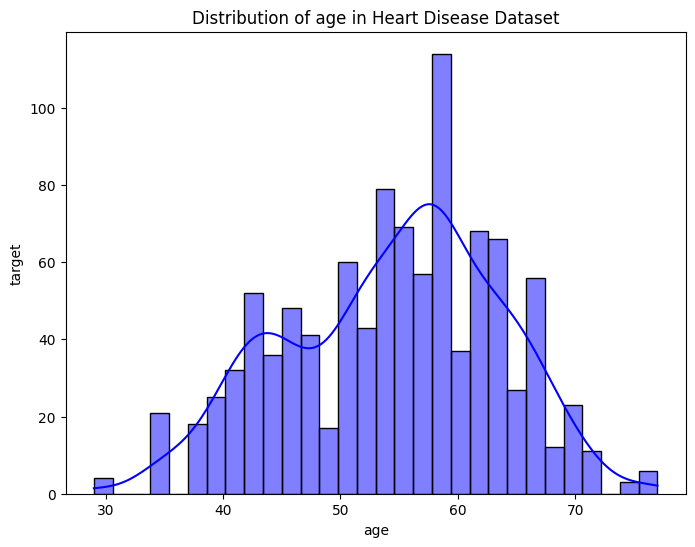

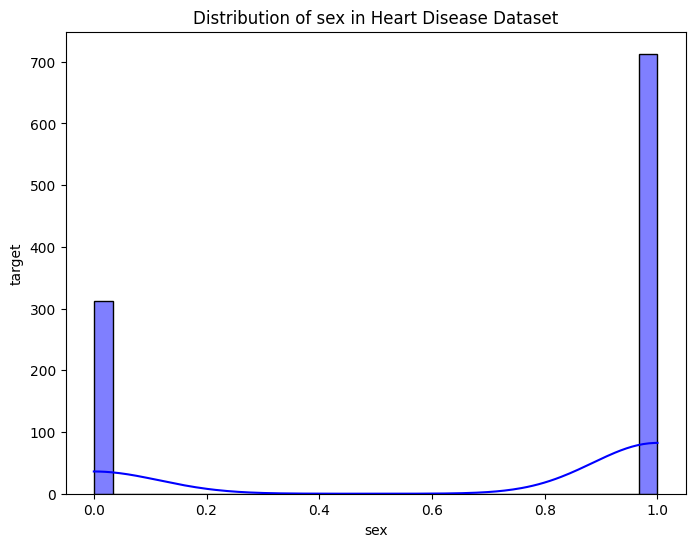

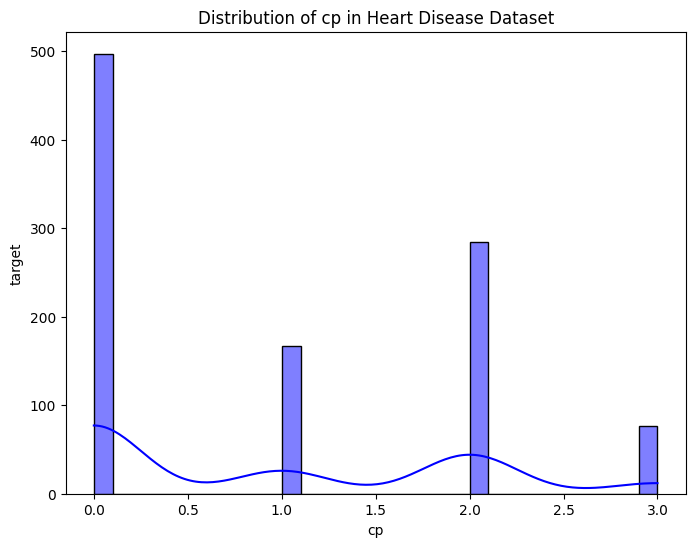

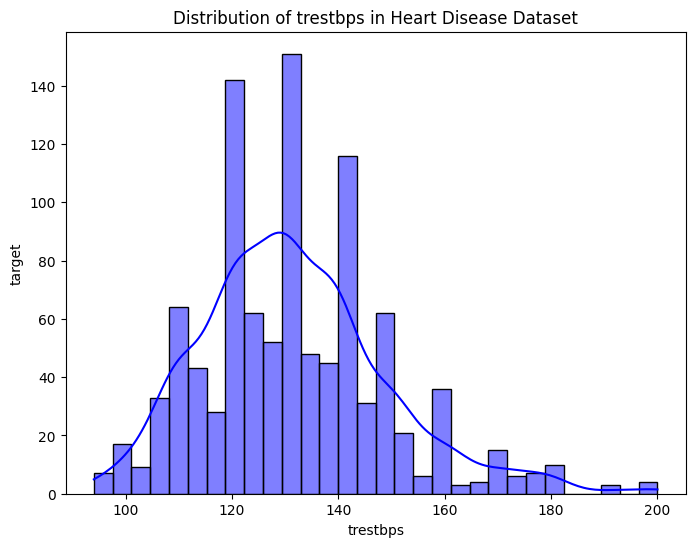

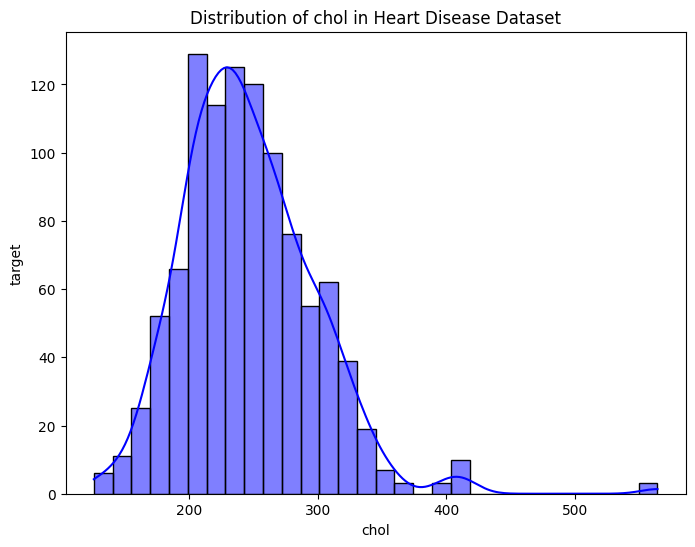

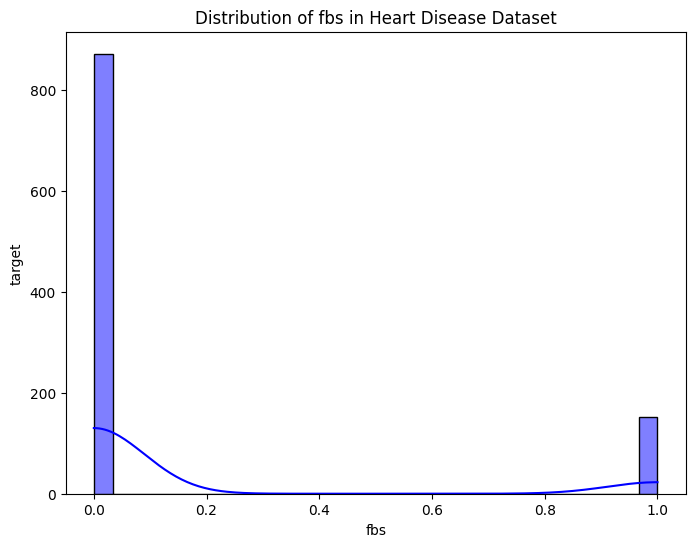

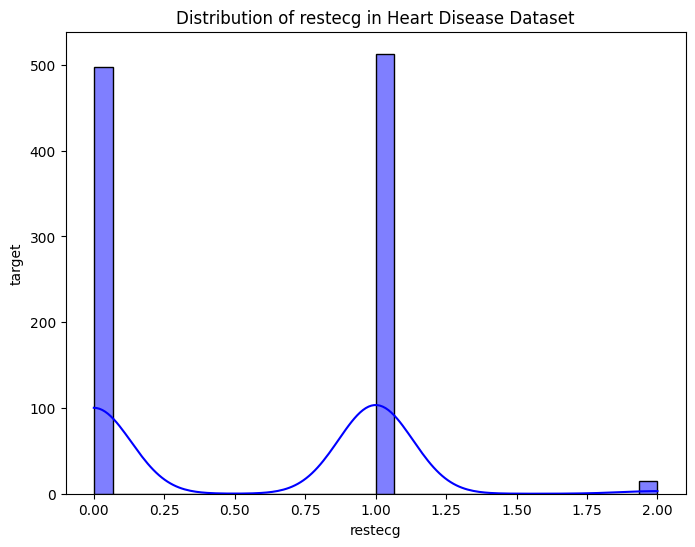

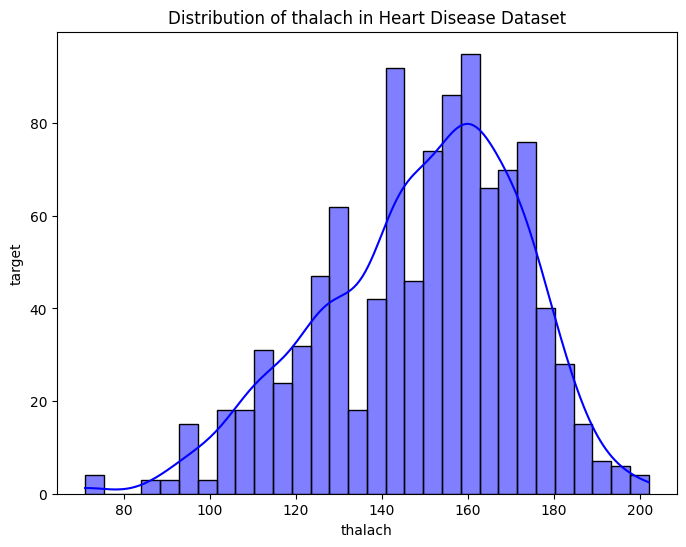

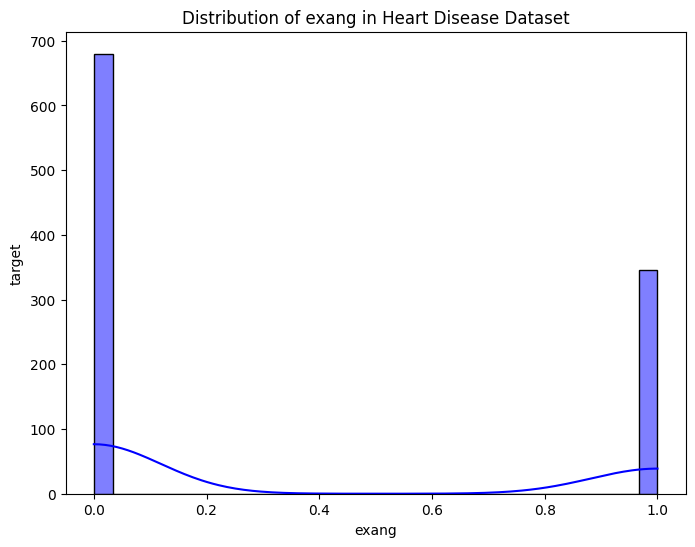

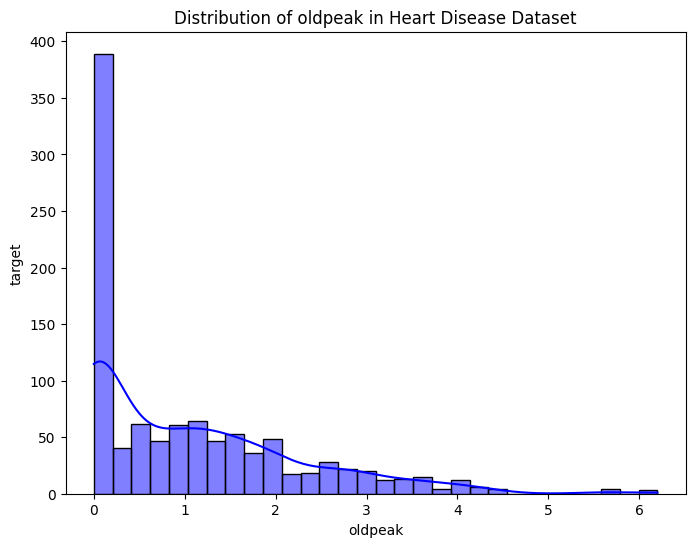

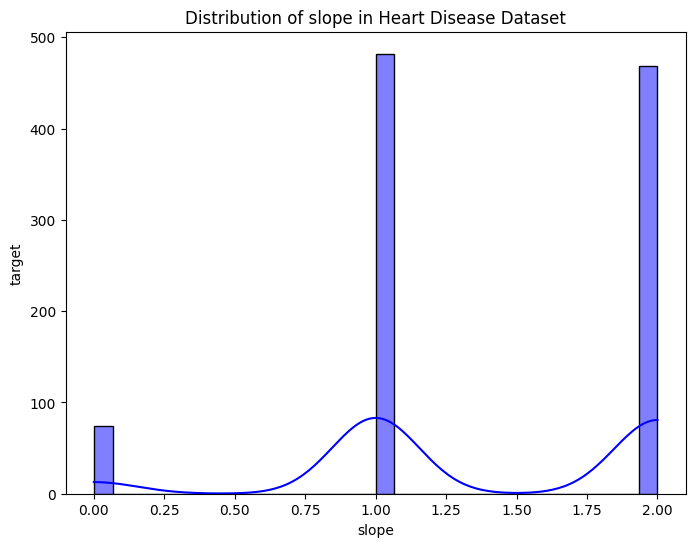

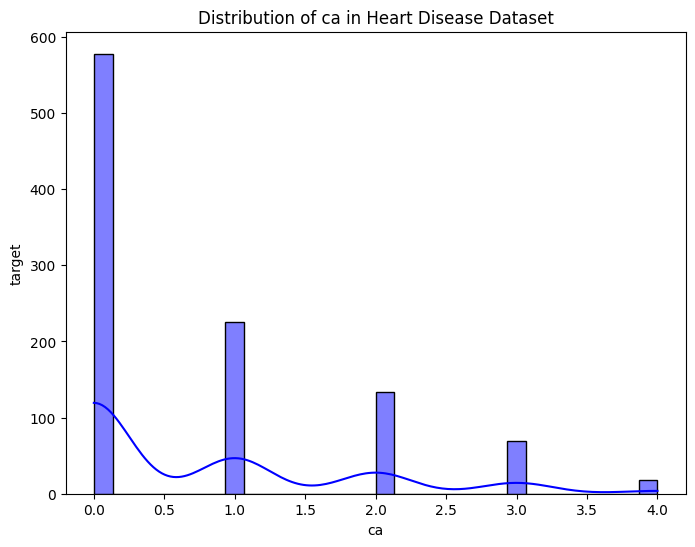

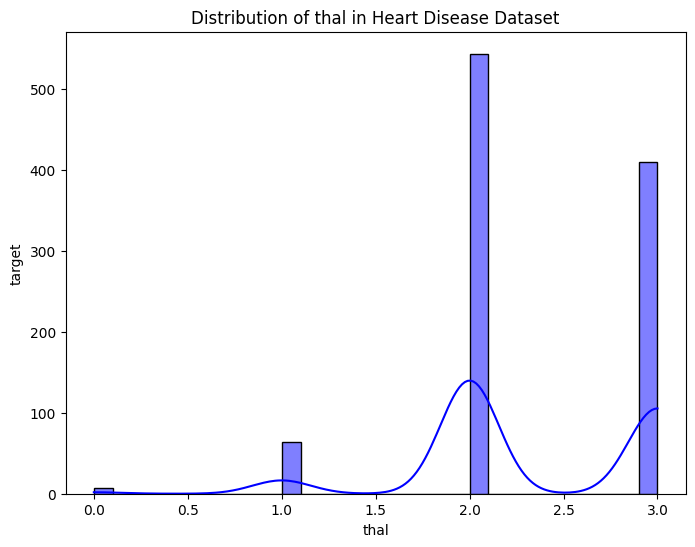

In [ ]:
features = ['age','sex', 'cp', 'trestbps', 'chol' ,'fbs', 'restecg', 'thalach','exang', 'oldpeak','slope', 'ca','thal']

# Vẽ histogram cho từng đặc trưng
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {feature} in Heart Disease Dataset')
    plt.xlabel(feature)
    plt.ylabel('target')
    plt.show()

# Chuẩn hóa Scaling
Quan sát dữ liệu, ta thấy các thông số trên các cột ‘sex’, ‘cp’, ‘fbs’, ‘restecg’, ‘exang’, ‘slope’, ‘ca’, ‘thal’ là các categorical nếu ta để nguyên các số này thì sẽ không hợp lý, ta cần trải ra . Và các cột ‘age’, ‘trestbps’, ‘chol’, ‘thalach’, ‘oldpeak’ là các numerical, ta cần scale nó lại

In [ ]:
columns_to_get_dummies = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
data = pd.get_dummies(df, columns=columns_to_get_dummies)
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])
data

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,0.479107,-0.484803,0.647366,-0.912329,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
1021,0.613800,-0.377636,0.232705,-0.352873,1.471705,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
1022,-0.819834,-1.234378,0.562371,-1.353113,-0.060888,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1023,-0.488996,-1.234378,0.155137,0.429923,-0.912329,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


#Chuẩn bị dữ liệu cho quá trình training
Tổng cộng có 1025 mẫu


---


Sử dụng 80% mẫu để train và 20% mẫu để test


---


Cột Target là chuẩn đoán có mắc bệnh tim hay là không (có =1, không =0)

In [ ]:
y = data['target']
X = data.drop('target', axis=1)

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state =1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(820, 30)
(205, 30)


1    430
0    390
Name: target, dtype: int64


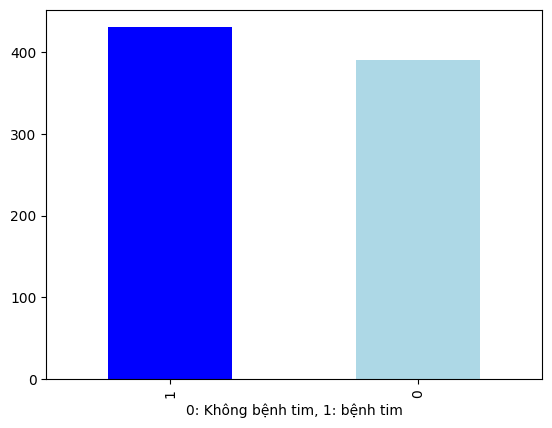

In [ ]:
#đếm giá trị bệnh tim và không bị bệnh tim
print(y_train.value_counts())
y_train.value_counts().plot.bar(color=['blue','lightblue'])
plt.xlabel('0: Không bệnh tim, 1: bệnh tim')
plt.show()

#  MA TRẬN NHẦM LẪN
[[TP, FN]

[FP, TN]]

 Trong đó:

TP (True Positive): Số lượng mẫu thực tế thuộc lớp dương và được mô hình phân loại đúng là thuộc lớp dương.

FN (False Negative): Số lượng mẫu thực tế thuộc lớp dương nhưng mô hình phân loại là thuộc lớp âm.

FP (False Positive): Số lượng mẫu thực tế thuộc lớp âm nhưng mô hình phân loại là thuộc lớp dương.

TN (True Negative): Số lượng mẫu thực tế thuộc lớp âm và được mô hình phân loại đúng là thuộc lớp âm.

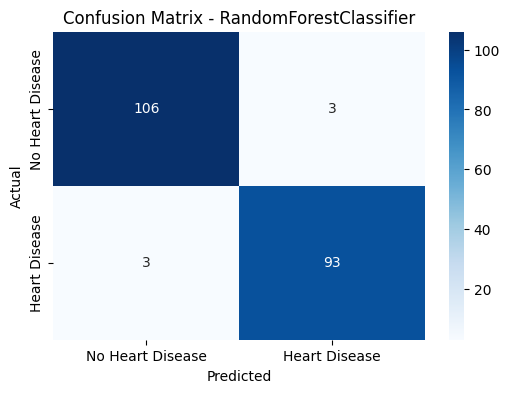

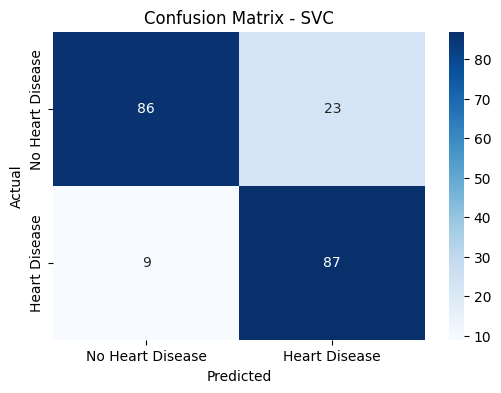

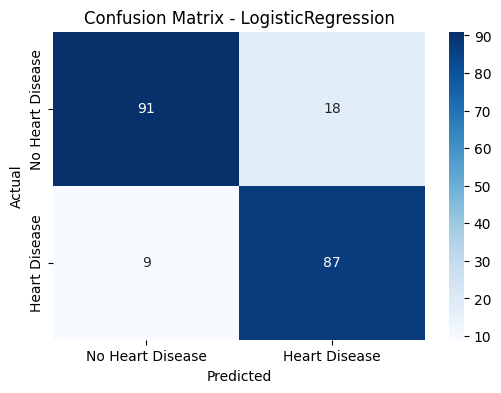

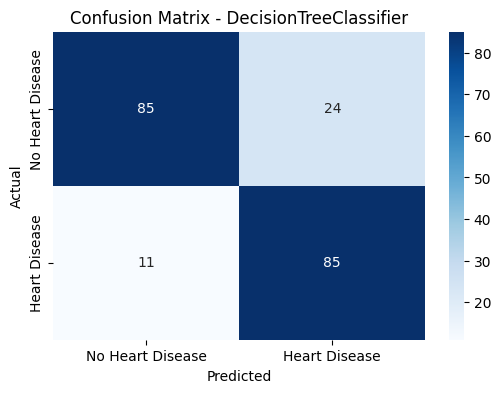

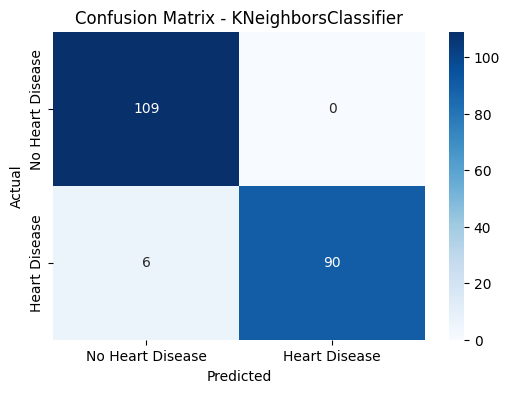

In [ ]:
# Danh sách các mô hình cần kiểm tra
models = [
    RandomForestClassifier(max_depth=6),
    SVC(kernel='linear',C=1),
    LogisticRegression(max_iter=500),
    DecisionTreeClassifier(criterion="entropy",max_depth=3),
    KNeighborsClassifier(n_neighbors = 3)
]
#lặp qua từng mô hình và hiển thị mô hình nhầm lẫn
for model in models:
    # Huấn luyện mô hình
    model.fit(X_train, y_train)

    # Dự đoán trên tập kiểm thử
    y_pred = model.predict(X_test)

    # Tạo ma trận nhầm lẫn
    cm = confusion_matrix(y_test, y_pred)

    # Hiển thị ma trận nhầm lẫn bằng heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No Heart Disease", "Heart Disease"],
                yticklabels=["No Heart Disease", "Heart Disease"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {type(model).__name__}")
    plt.show()

Ta có thể thể tập dữ liệu không bị mất cân bằng dữ liệu, dữ liệu chênh lệch nhau không đáng kể vì vậy không cần xử lý cân bằng dữ liệu
1. Nhãn 1 : mắc bệnh tim
2. Nhãn 0 : không mắc bệnh tim

# **XÂY DỰNG MÔ HÌNH**

# XÂY DỰNG MÔ HÌNH LOGISTIC REGRESSION

In [ ]:
Logic = LogisticRegression(max_iter=500)
Logic.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [ ]:
#Đánh giá mô hình
logic_pred = Logic.predict(X_test)

#Độ chính xác mô hình
accuracy_logic = accuracy_score(y_test, logic_pred)
#Độ bao phủ mô hình
recall_logic= recall_score(y_test, logic_pred)

print(f"Độ chính xác của mô hình logictic: {accuracy_logic * 100:.2f}%")
print(f"Độ bao phủ của mô hình logictic: {recall_logic * 100:.2f}%")
print("\nClassification Report:\n",metrics.classification_report(y_test, logic_pred))

Độ chính xác của mô hình logictic: 86.83%
Độ bao phủ của mô hình logictic: 90.62%

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87       109
           1       0.83      0.91      0.87        96

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



# XÂY DỰNG MÔ HÌNH KNN ( K-Nearest Neighbors Classifier )

Chọn dữ liệu 3 người giống nhất (n_neightbors =3) và đánh giá là người có chỉ số sức khoẻ cho kết quả dự đoán đáng tin.


---
chúng ta có thể tuỳ ý điều chỉnh lượng người (n_neightbors)

In [ ]:
KNN  = KNeighborsClassifier(n_neighbors =3)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#Đánh giá mô hình
knn_pred = KNN.predict(X_test)

#Độ chính xác mô hình
accuracy_knn = accuracy_score(y_test, knn_pred)
#Độ bao phủ mô hình
recall_knn= recall_score(y_test, knn_pred)

print(f"Độ chính xác của mô hình KNN: {accuracy_knn * 100:.2f}%")
print(f"Độ bao phủ của mô hình KNN: {recall_knn * 100:.2f}%")
#Báo cáo đánh giá mô hình
print("\nClassification Report:\n",metrics.classification_report(y_test, knn_pred))

Độ chính xác của mô hình KNN: 97.07%
Độ bao phủ của mô hình KNN: 93.75%

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       109
           1       1.00      0.94      0.97        96

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



# XÂY DỰNG MÔ HÌNH ID3 (Decision Tree)

Phân loại các điểm dựa trên đặc tính của các feature

In [ ]:
ID3 = DecisionTreeClassifier(criterion="entropy",max_depth=3)
ID3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
#Đánh giá mô hình
id3_pred = ID3.predict(X_test)

#Độ chính xác mô hình
accuracy_id3 = metrics.accuracy_score(y_test, id3_pred)
#Độ bao phủ mô hình
recall_id3= recall_score(y_test, id3_pred)

print(f"Độ chính xác của mô hình ID3: {accuracy_id3 * 100:.2f}%")
print(f"Độ bao phủ của mô hình ID3: {recall_id3 * 100:.2f}%")
print("\nClassification Report:\n",metrics.classification_report(y_test, id3_pred))

Độ chính xác của mô hình ID3: 82.93%
Độ bao phủ của mô hình ID3: 88.54%

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83       109
           1       0.78      0.89      0.83        96

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



# XÂY DỰNG MÔ HÌNH SVM

In [ ]:
#áp dụng SVM vào bài toán với kernel = linear
SVM = SVC(kernel='linear',C=1)
SVM.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [ ]:
#Đánh giá mô hình
svm_pred = SVM.predict(X_test)

#Độ chính xác mô hình
accuracy_svm = metrics.accuracy_score(y_test, svm_pred)
#Độ bao phủ mô hình
recall_svm= recall_score(y_test, svm_pred)

print(f"Độ chính xác của mô hình SVM khi kernel = linear: {accuracy_svm * 100:.2f}%")
print(f"Độ bao phủ của mô hình SVM: {recall_svm * 100:.2f}%")
print("\nClassification Report:\n",metrics.classification_report(y_test, svm_pred))

Độ chính xác của mô hình SVM khi kernel = linear: 84.39%
Độ bao phủ của mô hình SVM: 90.62%

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.79      0.84       109
           1       0.79      0.91      0.84        96

    accuracy                           0.84       205
   macro avg       0.85      0.85      0.84       205
weighted avg       0.85      0.84      0.84       205



# XÂY DỰNG MÔ HÌNH Random Forest Classifier
Cũng giống như mô hình ID3, nhưng ở đây ta tổng hợp nhiều Desion Tree và tạo thành Random forest nhằm tăng khả năng dự báo chính xác

In [ ]:
RF = RandomForestClassifier(max_depth=6)
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [ ]:
#Đánh giá mô hình
rf_pred = RF.predict(X_test)

# Độ chính xác
accuracy_rf = accuracy_score(y_test, rf_pred)
#Độ bao phủ mô hình
recall_rf= recall_score(y_test, rf_pred)

print(f"Độ chính xác của mô hình RandomForest: {accuracy_rf * 100:.2f}%")
print(f"Độ bao phủ của mô hình RandomForest: {recall_rf * 100:.2f}%")
# Báo cáo đánh giá mô hình
print("\nClassification Report:\n",metrics.classification_report(y_test, rf_pred))

Độ chính xác của mô hình RandomForest: 95.61%
Độ bao phủ của mô hình RandomForest: 96.88%

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       109
           1       0.94      0.97      0.95        96

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



# SỬ DỤNG MÔ HÌNH ROC CURVE

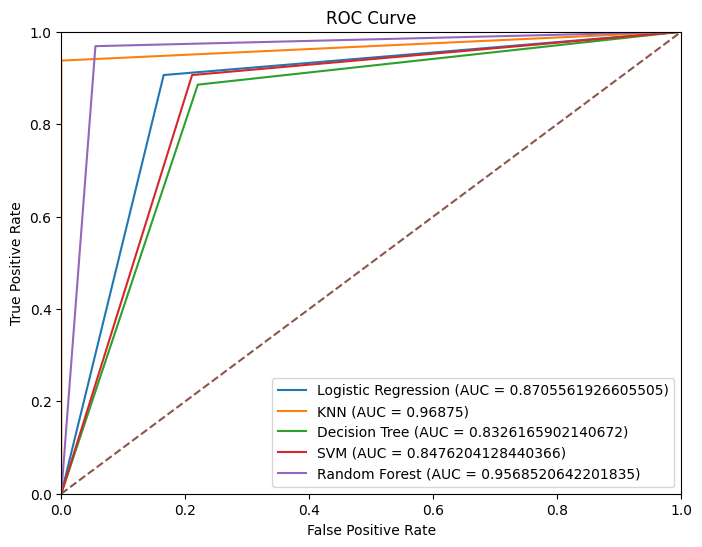

In [ ]:
models = [Logic,  KNN, ID3, SVM, RF]
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM', 'Random Forest']
aucs = []

plt.figure(figsize=(8, 6))
for model, name in zip(models, model_names):
    y_score = model.predict(X_test)
    fpr, tpr, _ = metrics.roc_curve(y_test,  model.predict(X_test))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr,label=f'{name} (AUC = {roc_auc})')

plt.plot([0, 1], [0, 1], '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.show()

# KẾT LUẬN

-Sau khi thử nghiệm và đánh giá qua 5 thuật toán học máy phía trên, ta có thể thấy mô hình **Random Forest** và **KNN** cho thấy kết quả cao  so với các mô hình khác, mặc dù tỉ lệ trên 95% là rất cao nhưng trong phạm vi thực hành mang tính khảo sát, chúng ta vẫn có thể chấp nhận con số này.

-Mô hình **Logistic Regression** và mô hình **SVM** là hai thuật toán cũng cho kết quả tương đối. Có thể là lựa chọn thay thế.

-Cuối cùng là mô hình **Decision Tree** là mô hình có hiệu quả thấp hơn nhưng cũng có thể chấp nhận được.

-Nhưng vì đây là mô hình dự đoán nên chúng ta sẽ chú ý vào giá trị recall - độ bao phủ mô hình. Mục đích của việc xem xét tỉ lệ recall để tránh bỏ sót bất cứ bệnh nhân nào giúp cho mô hình đạt hiệu suất được tốt hơn

=> Kết quả mang lại rất khả quan, rõ ràng các thuật toán học máy mang lại hiệu quả rất cao trong việc chẩn đoán các vấn đề về sức khỏe, nhờ đó mà có tính ứng dụng cao trong thực tiễn. Sau khi xét độ bao phủ RECALL ta có thể thấy đặc biệt là **Random Forest** cho kết quả cao nhất và vượt trội nhất.